In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [35]:
data=pd.read_csv('marketing_data.csv')

In [36]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [37]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [38]:
data.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

* income is given as object
* kidhome is a numeric data but it should be considered as categorical (ordinal) because you cannot have 500 kids there could be 10, 5 , 4 kids 

In [39]:
data.value_counts().sum()

2216

In [40]:
data.shape

(2240, 28)

In [41]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [31]:
data.dtypes


ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

## Estimation of location
`mean/Average` 

In [9]:
data['MntFruits'].mean()

26.302232142857143

In [17]:
data['MntSweetProducts'].mean()

27.06294642857143

In [18]:
data['MntGoldProds'].mean()

44.021875

In [19]:
data['MntWines'].mean()

303.9357142857143

### Median

In [16]:
data['MntFruits'].max()

199

In [13]:
data['MntFruits'].median()

8.0

In [17]:
data['MntSweetProducts'].max()

262

In [14]:
data['MntSweetProducts'].median()

8.0

In [18]:
data['MntGoldProds'].max()

321

In [15]:
data['MntGoldProds'].median()

25.0

In [20]:
data['MntWines'].max()

1493

In [11]:
data['MntWines'].median()

173.5

In [10]:
np.median(data['MntWines'])

173.5

### median absolute deviation 

In [12]:
from scipy import stats

In [13]:
stats.median_abs_deviation(data['MntWines'])


164.5

## Percentile

In [9]:
np.percentile(data['MntWines'],50)

178.0

## segratgate customer based on their income

In [42]:
data[' Income ']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [50]:
def extract_income(income):
    if isinstance(income,str):
        return float(income[1:].replace(',',''))
    return income

In [54]:
data[' Income ']=data[' Income '].apply(extract_income)

In [55]:
data[' Income ']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2240, dtype: float64

In [56]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
 Income                float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

<Axes: ylabel='Frequency'>

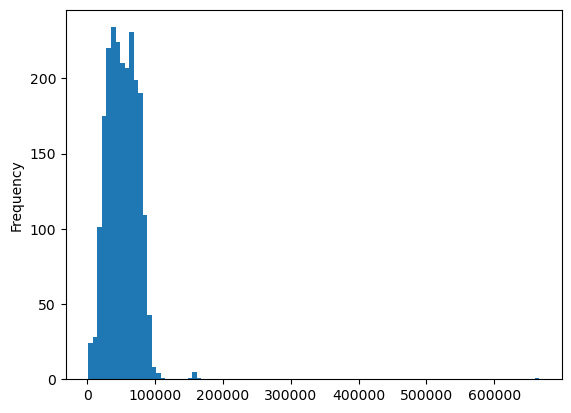

In [59]:
data[" Income "].plot.hist(bins=100)

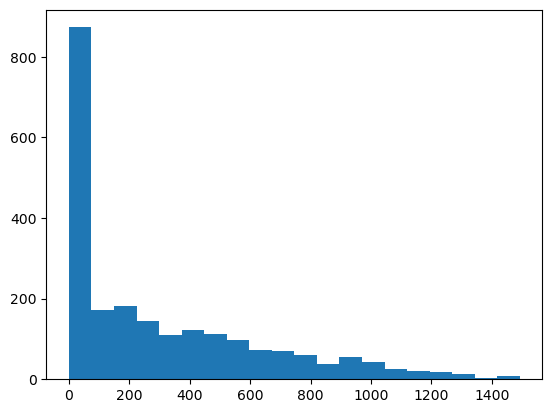

In [32]:
freq, bins,_=plt.hist(data['MntWines'],bins=20)

In [33]:
freq

array([873., 172., 181., 144., 111., 121., 113.,  97.,  73.,  69.,  61.,
        38.,  55.,  43.,  25.,  20.,  17.,  14.,   4.,   9.])

In [114]:
data[' Income ']=data[' Income '].apply(extract_income)

In [60]:
data[data[' Income '].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


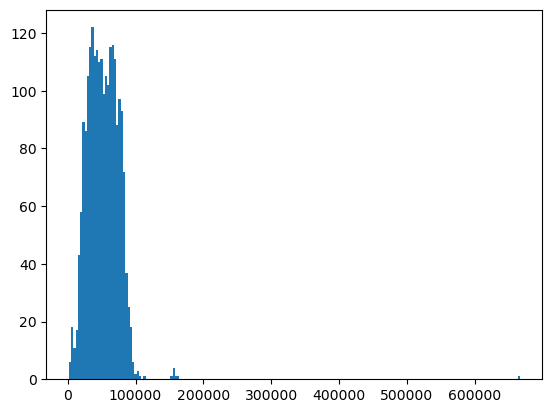

In [53]:
plt.hist(data[' Income '],bins=200)
plt.show()

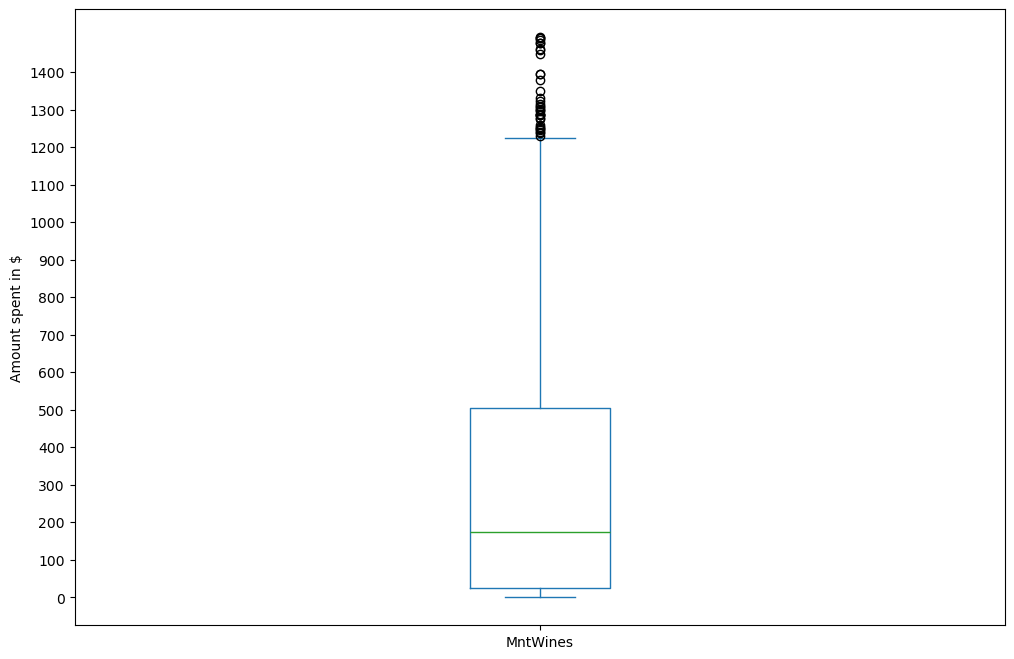

In [67]:
ax=data['MntWines'].plot.box(figsize=(12,8))
ax.set_ylabel("Amount spent in $")
ax.set_yticks(np.arange(0,1500,100))
plt.show()

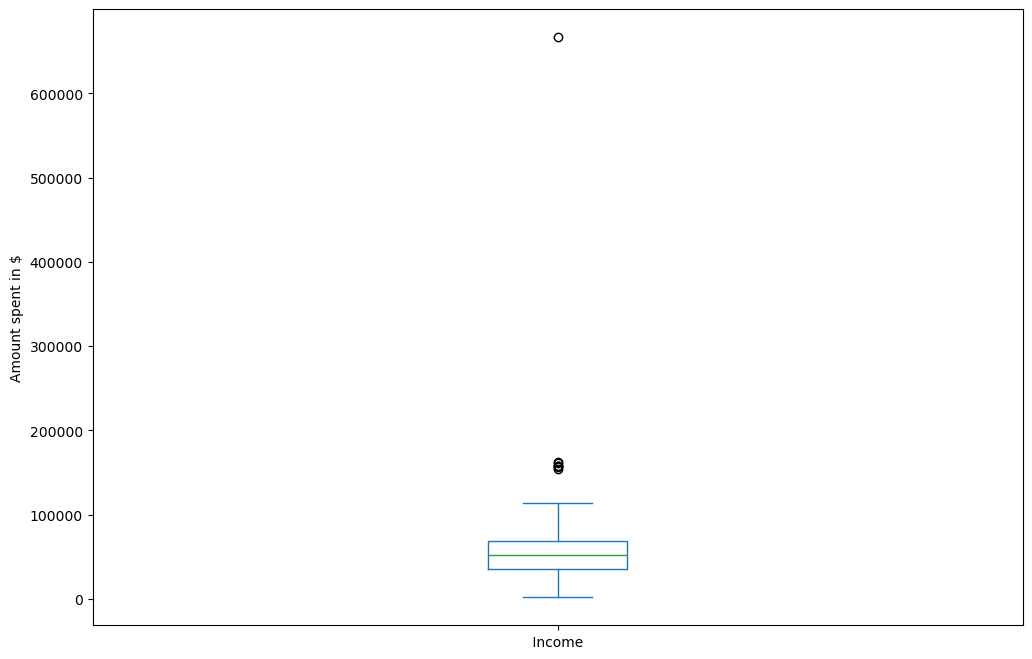

In [69]:
ax=data[' Income '].plot.box(figsize=(12,8))
ax.set_ylabel("Amount spent in $")
plt.show()

In [74]:
data.loc[data[' Income '] > 600000][" Income "]

527    666666.0
Name:  Income , dtype: float64

In [80]:
data[data[' Income ']>600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [82]:
1.5*stats.iqr(data[' Income '].dropna())

49828.5

In [83]:
np.percentile(data[' Income '].dropna(),75)

68522.0

In [84]:
upperRange=1.5*stats.iqr(data[' Income '].dropna())+np.quantile(data[' Income '].dropna(),0.75)

In [85]:
upperRange

118350.5

In [83]:
np.quantile(data[' Income '].dropna(),0.75)

68522.0

In [82]:
np.percentile(data[' Income '].dropna(),75)

68522.0

In [89]:
data.loc[data[' Income '] > 600000, " Income "]=upperRange

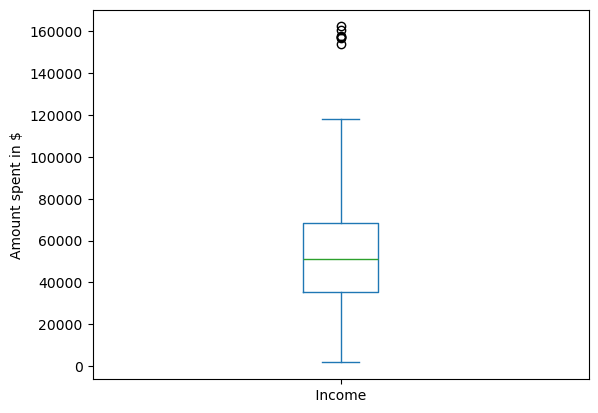

In [90]:
ax=data[' Income '].plot.box()
ax.set_ylabel("Amount spent in $")
plt.show()

(array([ 2.,  4.,  2., 16.,  5.,  5.,  3., 10., 21., 22., 25., 28., 39.,
        43., 36., 49., 40., 49., 50., 51., 59., 66., 67., 47., 51., 64.,
        50., 55., 47., 52., 56., 39., 58., 51., 52., 49., 44., 56., 57.,
        66., 54., 44., 56., 61., 34., 45., 41., 48., 46., 43., 36., 26.,
        22., 14.,  7., 15., 11.,  7.,  2.,  3.,  2.,  0.,  3.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  3.,  1.,  0.,  2.]),
 array([  1730.  ,   3336.67,   4943.34,   6550.01,   8156.68,   9763.35,
         11370.02,  12976.69,  14583.36,  16190.03,  17796.7 ,  19403.37,
         21010.04,  22616.71,  24223.38,  25830.05,  27436.72,  29043.39,
         30650.06,  32256.73,  33863.4 ,  35470.07,  37076.74,  38683.41,
         40290.08,  41896.75,  43503.42,  45110.09,  46716.76,  48323.43,
         49930.1 ,  51536.77,  53143.44,  54750.11,  56356.78,  

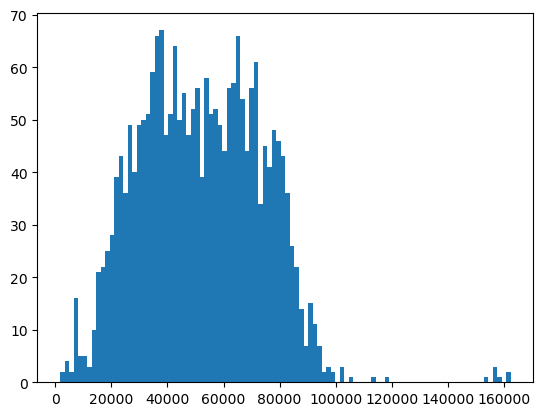

In [91]:
plt.hist(data[' Income '],bins=100)

### Barplot
#### Used for categorical variable

In [93]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

<Axes: xlabel='Education'>

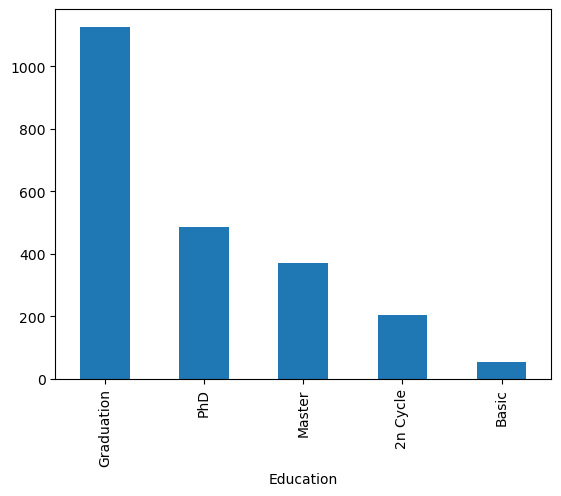

In [92]:
data['Education'].value_counts().plot.bar()

In [103]:
data['Education'].value_counts()

Education
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
118350.5         1
Name: count, dtype: int64

In [104]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826.0,1970.0,Graduation,Divorced,84835.0,0.0,0.0,6/16/14,0.0,189.0,...,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,SP
1,1.0,1961.0,Graduation,Single,57091.0,0.0,0.0,6/15/14,0.0,464.0,...,7.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,CA
2,10476.0,1958.0,Graduation,Married,67267.0,0.0,1.0,5/13/14,0.0,134.0,...,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,US
3,1386.0,1967.0,Graduation,Together,32474.0,1.0,1.0,5/11/14,0.0,10.0,...,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AUS
4,5371.0,1989.0,Graduation,Single,21474.0,1.0,0.0,4/8/14,0.0,6.0,...,2.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,SP


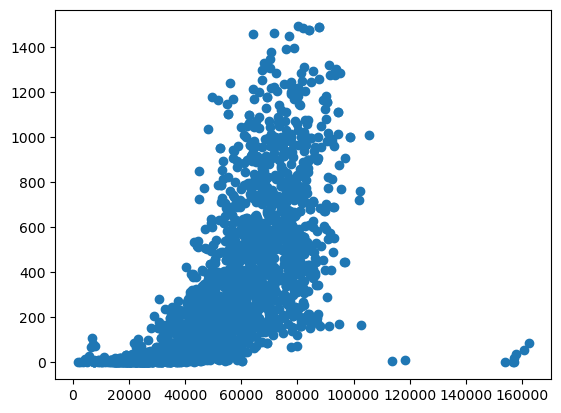

In [94]:
plt.scatter(x=data[' Income '],y=data['MntWines'])

In [95]:
data[data['MntWines']>10000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


marketing compaign vs income

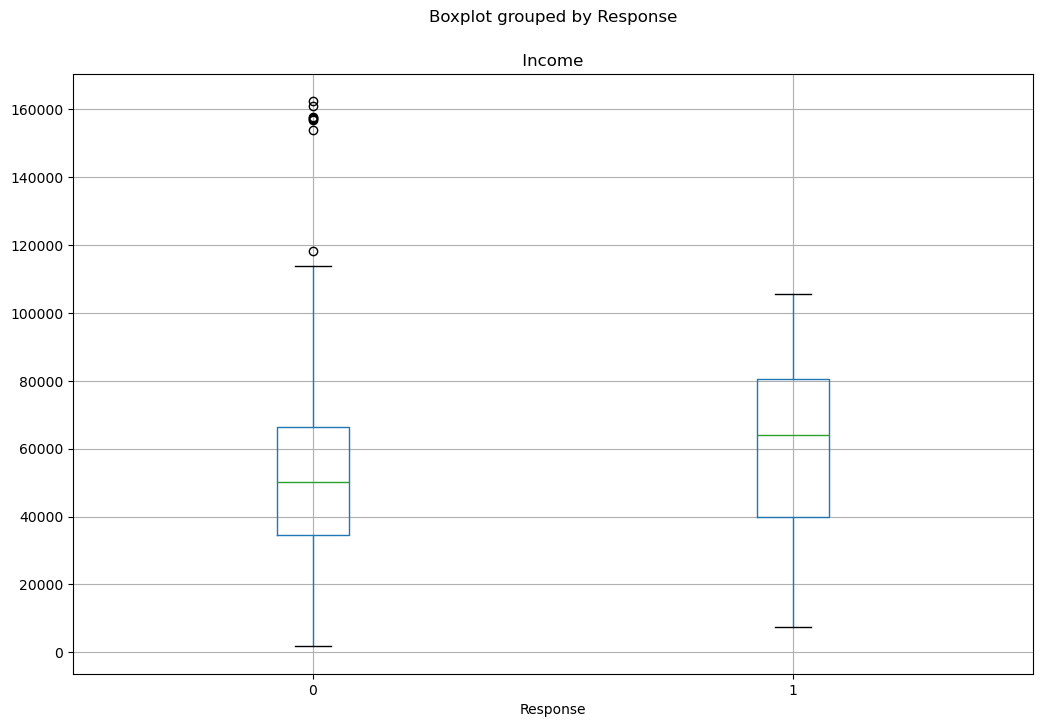

In [98]:
data.boxplot(column=' Income ', by='Response', figsize=(12,8))
plt.show()

In [96]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
